In [4]:
from alignment import *
from parsing import parse_matrix_and_gap_cost_in_subst_matrix,read_n_fasta
from msa_sp_score_3k import compute_sp_score
import os

In [5]:
matrix_path = 'input/subst_matrix.txt'
substitution_matrix = parse_matrix_and_gap_cost_in_subst_matrix(matrix_path)

Experiments:
Answer the following questions:

    - What is the score of an optimal aligment of the first 3 sequences in brca1-testseqs.fasta (i.e. brca1_bos_taurus, brca1_canis_lupus and brca1_gallus_gallus) as computed by your program sp_exact_3? How does an optimal alignment look like?



In [6]:
list_of_seq = read_n_fasta('experiments/brca1-testseqs.fasta',3)


exact_score_value, aligned_sequences = alignment_of_3_seqs(list_of_seq, substitution_matrix)
print("The optimal score is: ",exact_score_value)
for seq in aligned_sequences:
    print(seq)



The optimal score is:  790.0
ATGGATTTATCTGCGGATCATGTTGAAGAAGTACAAAATGTCCTCAATGCTATGCA-GAAAATCTTAG--AGTGTCCAAT-ATGTCTGGAGTTGATCAAAGAG-CCT-GTCTCTACAAAGTGTGA-CCA-CA-TATTTTGCAAATTTTG-TATGCTGAA-AC-TTCTCAACCA-GAAGAAAGGGCCTTCACAATGTCC--TTTGTGTAAGAATGA-
ATGGATTTATCTGCGGATCGTGTTGAAGAAGTACAAAATGTTCTTAATGCTATGCA-GAAAATCTTAG--AGTGTCCAAT-ATGTCTGGAGTTGATCAAAGAG-CCT-GTTTCTACAAAGTGTGA-TCA-CA-TATTTTGCAAATTTTG-TATGCTGAA-AC-TTCTCAACCA-GAGGAAGGGGCCTTCACAGTGTCC--TTTGTGTAAGAACGA-
GCGAA---ATGTA-ACA-CG-GTAGAGGTGAT-CGGGGTG-CGTT-ATAC-GTGCGTGGTGACCTCGGTCGGTGT-TGACGGTGCCTGGGGTTCCTCAGAGTGTTTTGGGGTCTGAAGGATG-GACTTGTCAGTG-ATTGCCATTGGAGACGTGCAAAATGTGCTTTCAGCCATGCAGAA-GAA-CTT-GGAGTGTCCAGTCTGTTTAGATGTGAT


    - What is the score of the alignment of the first 5 sequences in brca1-testseqs.fasta (i.e. brca1_bos_taurus, brca1_canis_lupus, brca1_gallus_gallus, brca1_homo_sapiens, and brca1_macaca_mulatta) as computed by your program sp_approx? Which of the 5 sequences is choosen as the 'center string'?


In [7]:
list_of_seq = read_n_fasta('experiments/brca1-testseqs.fasta',5)
M = two_approx_algorithm_for_MSA(list_of_seq, substitution_matrix)
score = sp_score(M,substitution_matrix)
print("The optimal score is: ",score)
alignment = print_alignment(M)

The optimal score is:  4395
ATGGATTTATCTGCGGATCATGTTGAAGA-AG-TAC--AA-AAT-GTCC-TCAATGCTATGCA-GAAAATCTTAG--AGTGTCCAATA-TGTCTGGAGTTGATCAAAGAGCCT-GTC-TCTACAAAGTGTGA-C-C-A-C--A-TATTTTGCAAATTTTGTAT-G-C-TG-AAAC-T--TCTCAACCA-GAAGAAAGGGCCT-T-CAC--AAT-GTCC--TTTGTGTAAGAATGA-
ATGGATTTATCTGCGGATCGTGTTGAAGA-AG-TAC--AA-AAT-GTTC-TTAATGCTATGCA-GAAAATCTTAG--AGTGTCCAATA-TGTCTGGAGTTGATCAAAGAGCCT-GTT-TCTACAAAGTGTGA-T-C-A-C--A-TATTTTGCAAATTTTGTAT-G-C-TG-AAAC-T--TCTCAACCA-GAGGAAGGGGCCT-T-CAC--AGT-GTCC--TTTGTGTAAGAACGA-
GCGAA---AT--GTA-A-CACGGTAGAGGTGA-T-C--GG-GGT-G-CG-TTA-TAC-GTGCGTGGTGACCTCGGTCGGTGTT-GACGGTGCCTGGGGTTCCTCAGAGTGTTTTGGGGTCTGAAGGATG-GA-C-TTGTC--AGTGATT-GCCA-TTGGAGAC-G-TGCA-AAATGTGCTTTCAGCCATGCAGAA-GAAC-T-T-GG---AGT-GTCCAGTCTGTTTAGATGTGAT
GTACCTTGATTT-CGTATTCTGA-GAGGC-TGCTGCTTAGCGGTAGCCCCTTGGT-TTCCGTG-GCAA-CGGAAA--AGCGCGGGA-A-T-TACAGA-TAAATTAAA-A-C-T-GCG-ACTGCGCGGCGTGAGCTC-G-CTGA-GACTTCCTGGACGGGGGACAGGC-TGTGGGG-T--T-TC--TCA-GATAACTGGGCCCCTGCGCTCAGGAGGCC--TTCACCCTC---T---
ATGGATTTATCTGCTGTTCGCGTT

    - Make an experiment comparing the scores of the alignments computed by sp_exact_3 and sp_approx that validates that the approximation ratio of sp_approx is 2(k-1)/k for k sequences. i.e 4/3 for three sequences. 
    
    You should use the testdata in testseqs.zip that contains 20 fasta files (testseqs_10_3.fasta, testseqs_20_3.fasta, ..., testseqs_200_3.fasta) each containing 3 sequences of lengths 10, 20, ..., 200.

    -For each triplet of sequences (i.e. each fasta file), you should compute the optimal score of an MSA using sp_exact_3 and the score of the alignment produced by sp_approx. Make a graph in which you plot the ratio of the computed scores for each sequence length. Comment on what you observe.

    The python script msa_sp_score_3k.py (or msa_sp_score.py if you are using Python 2.x) can be used to compute the SP-score of an alignment stored in FASTA format cf. the above distance matrix and gapcost.

Get scores of the approx and exact alignments:

In [8]:
## We have processed the files in testseqs and we have the files with the alignments. Now we can read the alignments and get the scores.
results = pd.DataFrame()
for filename in os.listdir('testseqs'):
    ####### approx
    testfile = 'testseqs/approx/aligned_'+filename
    if os.path.isfile(testfile):   
        number = int(filename.split('_')[1])
        results.loc[number,'approx_score']= compute_sp_score(testfile)
    ###### exact
    testfile = 'testseqs/exact/aligned_'+filename
    if os.path.isfile(testfile): 
        number = int(filename.split('_')[1])
        results.loc[number,'exact_score']= compute_sp_score(testfile)
results['ratio'] = results.approx_score / results.exact_score

In [9]:
results = results.reset_index().rename(columns = {'index' : 'seqSize'})
results = results.sort_values(by='seqSize')
results.head()

,seqSize,approx_score,exact_score,ratio
1,10,70.0,70.0,1.000000
12,20,140.0,135.0,1.037037
13,30,259.0,231.0,1.121212
14,40,337.0,326.0,1.033742
15,50,428.0,385.0,1.111688


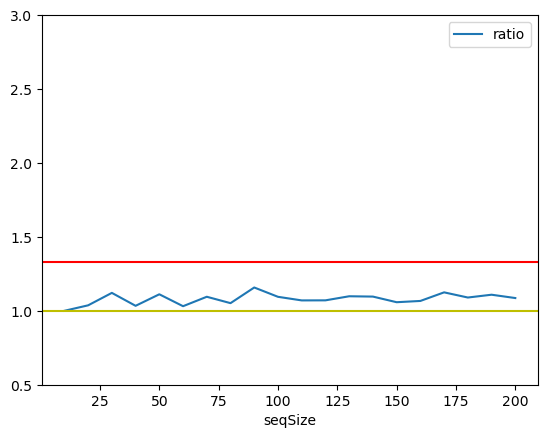

In [13]:
import matplotlib.pyplot as plt

# Plot a line of the 'y' column against the 'x' column
results.plot(x='seqSize', y='ratio', kind='line')
plt.axhline(y=1, color='y', linestyle='-')
plt.axhline(y=4/3, color='r', linestyle='-')
plt.ylim(0.5,3)
plt.show()